# Setpoint Reinforcement Learning
*Target a score for generalized control*

---

*Nous avions considéré en sortie de notre environnement :*

**Observations :** Acquisition d'une variable $s$ de l'ensemble des états $S$ et actions $A$. Ensuite, nous appliquons la transformation suivante : $  (S,A) \rightarrow \left \{ a_{(i,t-1)}, s_{(i,t-1)}, s_{(i,t)}, s_{c(i,t+1)} \right \} $. Avec $s_{c(i,t+1)}$ la consigne de l'état choisi et $a_{(i,t-1)}$, l'action au temps précedent.

La prise en compte de l'action et de l'etat à l'instant precedent est facultatif, mais permettent d'avoir une comprehension plus fine du système dynamique (linéaire ou non). L'etat à l'instant precedant permet d'intégrer l'information de variation et l'action permet de savoir s'il y a un effet d'inversion (ex : oscillation).

Suivant notre approche, nous abordons ici un controleur naif généralisé, tel que l'action suivante peut s'ecrire quelquesoit $t$ :

$$a_{t} = sgn(a_{t-1}) \cdot sgn(s_{t} - s_{t-1}) \cdot sgn(s_{c, t+1} - s_{t})$$



Ici, nous utilisons l'environnement CartPole pour tester ce controleurs :

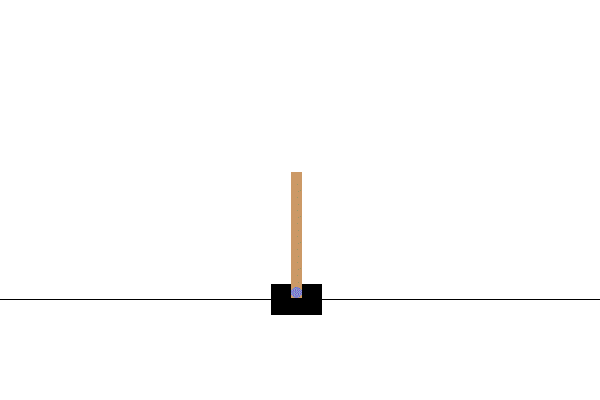

**Observation à controler :**

*Num* : 2

*Observation* : Pole Angle

*Min* : ~ -0.418 rad (-24°)

*Max* : ~ 0.418 rad (24°)



---

## Algorithme

In [ ]:
import gym

env = gym.make('CartPole-v1')

37


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


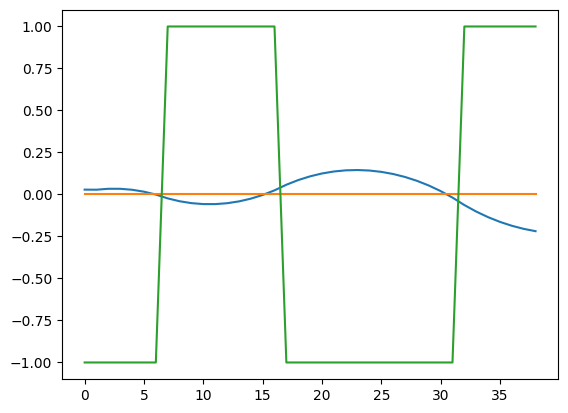

In [62]:
import numpy as np, pylab as plt

# parameter
consigne = 0.
# init
state = env.reset()
# variable
sts = [consigne]
angle = state[2]
rad = [angle]
for i in range(env._max_episode_steps) :
  if i == 0 :
    action = env.action_space.sample()
    push_action = -1. if action == 0 else 1.
    act = [push_action]
  else :
    push_action = np.sign(push_action)*np.sign(angle-prev_angle)*np.sign(consigne-angle)
    push_action = np.sign(push_action)*np.sign(consigne-angle)
    push_action = np.sign(consigne-angle)
    action = 1 if push_action < 0 else 0
  state, reward, done, info = env.step(action)
  # update
  prev_angle = angle
  angle = state[2]
  sts += [consigne]
  rad += [angle]
  act += [push_action]
  if done : break
print(i)
plt.plot(rad); plt.plot(sts); plt.plot(act); plt.show()